# Assignment 3 - Supervised Learning

## *AKSHAY PUNWATKAR*
Netid: AP509

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
1. Understand the primary workflow in machine learning: (1) identifying a hypothesis function set of models, (2) determining a loss/cost/error/objective function to minimize, and (3) minimizing that function through gradient descent
2. Implement batch gradient descent and become familiar with how that technique is used and its dependence on the choice of learning rate
3. Gain practice in implementing machine learning algorithms to understand the math and programming behind them to achieve practical proficiency with the techniques
4. Evaluate supervised learning algorithm performance through ROC curves and using cross validation
5. Work with imagery data and the basics of computer vision approaches to machine learning
6. Develop an understanding the optimal minimum misclassification error classifier (Bayes' classifier)

In [5]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
%config InlineBackend.figure_format = 'retina'

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \dfrac{e^x}{1+e^{x}}= \dfrac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^{\intercal} \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $\mathbf{x}_i=[x_{i,0}, x_{i,1}, x_{i,2}]^{\intercal}$, and $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model parameters. For one sample, $(y_i, \mathbf{x}_i)$, this is given as:

$$P(Y=y_i|X=\mathbf{x}_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

*Aside: the careful reader will recognize this expression looks different from when we talk about the likelihood of our data given the true class label, typically expressed as $P(x|y)$, or the posterior probability of a class label given our data, typically expressed as $P(y|x)$. In the context of training a logistic regression model, we know the training $\mathbf{x}$ values and $y$ values, so the above probability is primarily a function of the logistic regression parameters, $\mathbf{w}$. It's our goal to use this to choose the parameters to maximize the probability of our data by adjusting our model*

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function for all the $N$ samples in our training dataset that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]^{\intercal}$, and output the class confidence probabilities, $P(Y=y_i|X=\mathbf{x}_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm.  In doing this we'll need to make some assumptions about and/or experiment with the following:
1. **The initialization of the algorithm** - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.   

2. **The learning rate** - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.

3. **Stopping criteria** - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

Please compute your cost function for a batch as the average cost for the data in your current batch (in this case, a batch is your entire training dataset). In other words, divide your cost by the number of samples in each batch.

**(j)** Design your approach so that at each step in the gradient descent algorithm it will produce updated parameter estimates.   
> * For each set of estimates, calculate the cost function for both the **training and the test data** (no output is necessary here, but this is used in the following question).

**(k)** Divide your data into a **training and testing** set where the **test set accounts for 30 percent** of the data and the training set the remaining 70 percent.     
> * Show the gradient descent process for different learning rates by plotting the resulting cost as a function of each iteration (or "epoch").     
> * What is the impact that each parameter has on the process and the results?    
> * What choices did you make in your chosen approach and why?    
> * Use the parameter you choose here for the learning rate for the remainder of this question.    

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful).    
> * Produce Receiver Operating Characteristic curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatter-plot and the decision boundary for your classifier.    
> * Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing.    
> * Show the ROC curve for your model and plot the chance diagonal.   
> * What area under the curve (AUC) does your model achieve?    
> * How does your model compare in terms of performance?

## ANSWER

****

### Cost function and model parameters

## (A)

**Likelihood function for all *N* samples in training dataset is given as :**

$\hspace{2cm}\mathbf{P}(\mathbf{Y}=\mathbf{y}_i | \mathbf{X}=\mathbf{x}_i)\hspace{0.1cm}=
\hspace{0.1cm}\sigma(\mathbf{w}^{T}\mathbf{x})$ = $\dfrac{1}{1+e^{-\mathbf{w}^{\intercal}\mathbf{x}}}\hspace{0.1cm}$      
$\hspace{0.1cm}$           
$\hspace{0.1cm}$  

$\hspace{2cm}\mathbf{P}(\mathbf{y}|\mathbf{X}) = \prod_{i=1}^{N} \mathbf{P}(\mathbf{y}_i|\mathbf{x}_i)\hspace{0.1cm},\hspace{0.1cm} Substituting\hspace{0.1cm}values$    
$\hspace{0.1cm}$            
$\hspace{0.1cm}$      

$\hspace{2cm}\mathbf{P}(\mathbf{y}|\mathbf{X}) = \prod_{i=1}^{N} \sigma (\mathbf{w}^{\intercal}\mathbf{x}_i)^{y_{i}}[1-\sigma (\mathbf{w}^{\intercal}\mathbf{x}_i)^{y_{i}}]^{1-y_{i}}\hspace{0.2cm}is\hspace{0.1cm}the\hspace{0.1cm}likelihood\hspace{0.1cm}function$

$\hspace{2cm}Where\hspace{0.1cm}:$     
     
$\hspace{2cm}\mathbf{P}(\mathbf{y}|\mathbf{X})\hspace{0.2cm}is\hspace{0.1cm}the\hspace{0.1cm}likelihood\hspace{0.1cm}of\hspace{0.1cm}y\hspace{0.1cm}given\hspace{0.1cm}X$    
              
$\hspace{2cm}\sigma (\mathbf{w}^{\intercal}\mathbf{x})$ = $\dfrac{1}{1+e^{-\mathbf{w}^{\intercal}\mathbf{x}}}\hspace{0.1cm}:Sigmoid\hspace{0.1cm}function\hspace{0.1cm}
\hspace{0.1cm}which\hspace{0.1cm}is\hspace{0.1cm}the\hspace{0.1cm}probability\hspace{0.1cm}of\hspace{0.1cm}y\hspace{0.1cm}being\hspace{0.1cm}1$

****

## (B)

**Log Likelihood function (Average cost) for all N samples in training data is given as:**

$\hspace{2cm}\mathbf{C}(\mathbf{w}) =\hspace{0.5cm}-\ln(\mathbf{P}(\mathbf{y}|\mathbf{X}))$ 
$\hspace{0.1cm}$        
$\hspace{0.1cm}$    
$\hspace{3cm}=\hspace{0.5cm} - \ln(\prod_{i=1}^{N} \sigma (\mathbf{w}^{\intercal}\mathbf{x}_i)^{y_{i}}[1-\sigma 
(\mathbf{w}^{\intercal}\mathbf{x}_i)^{y_{i}}]^{1-y_{i}})$    
$\hspace{0.1cm}$         
$\hspace{0.1cm}$     
$\hspace{2cm}Substituting\hspace{0.1cm}\sigma(\mathbf{w}^{\intercal}\mathbf{x})\hspace{0.1cm}as\hspace{0.1cm}\hat{\mathbf{y}}\hspace{0.1cm}and\hspace{0.1cm}solving:$    
$\hspace{0.1cm}$         
$\hspace{0.1cm}$     
$\hspace{2cm}\mathbf{C}(\mathbf{w}) = \hspace{0.5cm} - \dfrac{1}{\mathbf{N}} \sum_{i=1}^{\mathbf{N}} ( \mathbf{y}_i\ln(\hat{\mathbf{y}}_i)+ 
(1-\mathbf{y}_i)\ln(1-\hat{\mathbf{y}}_i))\hspace{0.1cm},\hspace{0.1cm}is\hspace{0.1cm}the\hspace{0.1cm}average\hspace{0.1cm}cost$

$\hspace{2cm}Where\hspace{0.1cm}:$     
     
$\hspace{3cm}\hat{\mathbf{y}}_{i} = \sigma (\mathbf{w}^{\intercal}\mathbf{x}_{i})$

*****

## (C)

**Gradient is given as the partial derivative of the cost w.r.t to the weights:**

$\hspace{2cm}\dfrac{\partial{C}}{{\partial{w}_0}} = \hspace{0.5cm}\dfrac{\partial}{\partial{w}_0} (- \dfrac{1}{\mathbf{N}} \sum_{i=1}^{\mathbf{N}} ( \mathbf{y}_i\ln(\hat{\mathbf{y}}_i)+ (1-\mathbf{y}_i)\ln(1-\hat{\mathbf{y}}_i)))$    
$\hspace{0.1cm}$    
$\hspace{3cm}=\hspace{0.5cm}\dfrac{1}{\mathbf{N}}\sum_{i=1}^{\mathbf{N}}\mathbf{x}_{i,0}\hat{\mathbf{y}}-\mathbf{y}_i\mathbf{x}_{i,0}$   
$\hspace{0.1cm}$     
$\hspace{3cm}=\hspace{0.5cm}\dfrac{1}{\mathbf{N}}\sum_{i=1}^{\mathbf{N}}(\hat{\mathbf{y}}-\mathbf{y}_i)\mathbf{x}_{i,0}$   
$\hspace{0.1cm}$     
$\hspace{2cm}Similarly\hspace{0.1cm}for\hspace{0.1cm}\dfrac{\partial{C}}{{\partial{w}_1}}\hspace{0.1cm}and\hspace{0.1cm}\dfrac{\partial{C}}{{\partial{w}_2}}:$  
$\hspace{0.1cm}$  
$\hspace{2cm}\dfrac{\partial{C}}{{\partial{w}_1}}=\hspace{0.5cm}\dfrac{1}{\mathbf{N}}\sum_{i=1}^{\mathbf{N}}(\hat{\mathbf{y}}-\mathbf{y}_i)\mathbf{x}_{i,1}$   
$\hspace{0.1cm}$    
$\hspace{2cm}\dfrac{\partial{C}}{{\partial{w}_2}}=\hspace{0.5cm}\dfrac{1}{\mathbf{N}}\sum_{i=1}^{\mathbf{N}}(\hat{\mathbf{y}}-\mathbf{y}_i)\mathbf{x}_{i,2}$   
$\hspace{0.1cm}$    
$\hspace{2cm}Vectorize\hspace{0.1cm}form:$    
$\hspace{0.1cm}$    
$\hspace{3cm}\nabla_{\mathbf{w}_j}\mathbf{C}(\mathbf{w}) = \dfrac{1}{\mathbf{N}}\sum_{i=1}^{\mathbf{N}} ( \hat{\mathbf{y}_{i}}-\mathbf{y}_{i})\mathbf{x}_{i,j}$

$\hspace{2cm}Where:$   
     
$\hspace{2cm}\hat{\mathbf{y}}_i = \sigma (\mathbf{w}^{\intercal}\mathbf{x}_i)$    
$\hspace{0.1cm}$.  
$\hspace{2cm}\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$.

****

## (D)

**Gradient descent is given as:**

$\hspace{2cm}\mathbf{w}_{i+1,0} = \mathbf{w}_{i+1,0} - \eta\dfrac{\partial{\mathbf{C}}}{\partial{\mathbf{w}_0}}$    
$\hspace{0.1cm}$   
$\hspace{2.1cm} = \mathbf{w}_{i+1,0} - \eta\dfrac{1}{\mathbf{N}}\sum_{i=1}^{\mathbf{N}}(\hat{\mathbf{y}}-\mathbf{y}_i)\mathbf{x}_{i,0}$    
$\hspace{0.1cm}$   
$\hspace{2cm}Vectorize\hspace{0.1cm}form:$ 
$\hspace{0.1cm}$   
$\hspace{0.1cm}$    
$\hspace{2cm}w_{i+1,j} := w_{i,j} - \dfrac{\eta}{N}\sum_{i=1}^{N} ( \hat y_{i}-y_{i})x_{i,j}$ 

$\hspace{2cm}Where:$   

$\hspace{2cm}\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$.
     
$\hspace{2cm}w_{i}\hspace{0.1cm}=\hspace{0.1cm}Weights\hspace{0.1cm}in\hspace{0.1cm}the\hspace{0.1cm}equation\hspace{0.1cm}or\hspace{0.1cm}
otherwise\hspace{0.1cm}known\hspace{0.1cm}as\hspace{0.1cm}(\beta_{0}, \beta_{1} ..)$   
     
$\hspace{2cm}\eta\hspace{0.1cm}=\hspace{0.1cm}Learning\hspace{0.1cm}rate$

$\hspace{2cm}\mathbf{m}\hspace{0.1cm}=\hspace{0.1cm}Number\hspace{0.1cm}of\hspace{0.1cm}Observations\hspace{0.1cm}in\hspace{0.1cm}data$

$\hspace{2cm}\hat{\mathbf{y}}_{i} = \sigma (\mathbf{w}^{\intercal}\mathbf{x}_i)$

****

### Data Preparation and Plotting

## (E)

In [261]:
# Importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import math
import time as t
import pandas as pd
import seaborn as sns
#Reading data 
data = pd.read_csv("A3_Q1_data.csv")
data.head()

,x1,x2,y
0,2.553124,0.337757,0.0
1,-0.877757,0.045790,1.0
2,-0.903528,0.368076,1.0
3,-1.532152,-0.863737,1.0
4,-0.046954,-0.388761,1.0


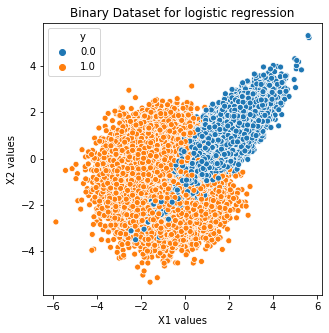

In [262]:
ax = sns.scatterplot(x="x1",y="x2",hue="y", data = data)
plt.title("Binary Dataset for logistic regression")
plt.xlabel("X1 values")
plt.ylabel("X2 values")
plt.show()

The plot does look separable but not exactly linearly separable due to overlapping areas. I don't think 1st degree logistic regression will provide a best decision boundary. However, a polynomial boundary (parabolic) would be a good fit. A similar boundary could be achieved using KNN. And given the overlap, the best seperation could be achieved using a SVM projecting the data on a hyper plane.

*****

## (F)

Upon checking the data, **No missing** values were found, and both the dimension *x_{1}* and *x_{2}* seems to be on the same scale and in the range of -6 to -6. Though the data could be normalised, but these values would do just fine as well in the regression model.

****

### Gradient Descent and Logistic Regression algorithm

## (G)  (H)  (I)  (J)

In [286]:
class Logistic_Regression:
    '''
    Implementation of Logistic regression class with gradient descent
    '''    
    def __inti__(self):
        self.X = np.array(())
        self.y = np.array(())
        self.w = np.array(())
        self.x_test = np.array(())
        self.X_test = np.array(())
        self.y_test = np.array(())

    
    # Fitting and initializing values 
    def fit(self,X,y,max_iter=100, weights = [],learningRate=0.1, 
            random = 123, show_status=False, status_after= 10,
            X_test=0,y_test=0,test_included=False):
        np.random.seed(random)
        self.X = np.insert(X,0,1,axis=1)
        self.y = y
        if (weights == []):
            self.w = np.random.rand(np.shape(self.X)[1]).T
        else:   
            self.w = np.arrays(weights).T
        self.alpha = learningRate
        self.max_iter = max_iter
        self.m = len(self.y)
        self.train_cost = []
        self.show_status = show_status
        self.status_after = status_after
        self.X_test = np.insert(X_test,0,1,axis=1)
        self.y_test = y_test
        self.test_cost = []
        self.flag = test_included
        self.gradientDescent()
        
    # Sigmoid function 
    def sigmoid(self,x=np.array(())):
        return 1 / (1 + np.exp(-x))
    
    # Function to calculate cost associated to point(s)
    def costFunction(self, X_= 0, y_= 0, w_= 0, y_hat_=0,x_val=0,y_val=0):
        '''
        Function to calculate cost at a given points or
        Average cost for a set of points 
        '''
        m = len(X_)
        y_hat = 0
        if y_hat_ == 0:
            y_hat = self.sigmoid(np.dot(X_,w_))
        else:
            y_hat = y_hat_
        cost = (1/m)*(np.dot(-y_,np.log(y_hat)) - np.dot((1-y_).T,np.log(1-y_hat)))
        return cost
    
    # Function to calculate gradient
    def gradient(self):
        '''
        Function to calculate gradient at a given point. 
        In case of training set, average value of the gradient 
        is returned 
        '''
        y_hat = self.sigmoid(np.dot(self.X,self.w))
        grad = (1/self.m) * np.dot(self.X.T,(y_hat-self.y))
        return grad
        
    # Gradient descent function to reduce cost     
    def gradientDescent(self): 
        '''
        Function to perform gradient descent for logistic 
        regression for minimizing the cost 
        at a given learning rate provided in *fit*
        '''
        i = 0
        step = 1
        #self.train_cost.append(self.costFunction()) 
        #saving the initial cost
        while (step >= 1.0e-06):
            orig_dist = np.linalg.norm(self.w,ord=2)
            
            #calculating new weights 
            self.w = self.w - self.alpha * self.gradient()
            new_dist = np.linalg.norm(self.w,ord=2)
            step = abs(orig_dist-new_dist)
            i += 1
            self.tot_iter = i
            cost = self.costFunction(self.X,self.y,self.w)
            self.train_cost.append(cost)
            if self.flag == True:
                cost_test = self.costFunction(self.X_test,
                                              self.y_test,self.w)
                self.test_cost.append(cost_test) 
            if self.show_status == True :
                if( i%self.status_after == 0):
                    print("For iteration : %s  \
                          cost is : %s and step = %s"%(i,cost,step))
        return self        
    
    # Predict function 
    def predict(self,X_test, responseType = "Binary", thresh=0.5):
        '''
        Function to predict and classify a new observations 
        responseType =  "Binary" (defualt) for binary classification ; 
                        "Probab" for probability as response 
        thresh = 0.5 (default) ; threshold for binary classification
        '''
        self.X_test = np.insert(X_test,0,1,axis=1)
        
        # predicting the prbability
        y_hat = self.sigmoid(np.dot(self.X_test,self.w))
        
        if(responseType=="Probab"):
            return y_hat
        else:
            pred = np.zeros(len(y_hat))
            for i in range(len(y_hat)):
                if y_hat[i] > thresh:
                    pred[i] = 1
            return pred        

*****

## (K)

In [266]:
X_data = data.iloc[:,:2].values
y_data = data.iloc[:,2].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = 
train_test_split(X_data, y_data, test_size = 0.30)

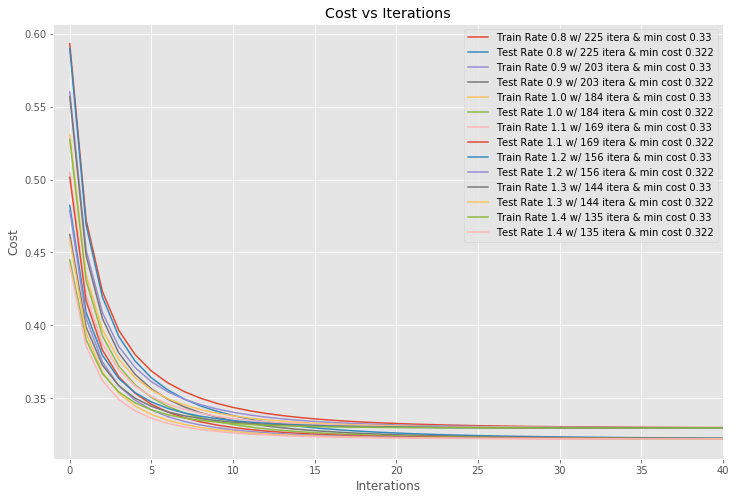

In [278]:
# plotting number of interations for different learning rate
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 10})
rates = np.arange(0.8,1.5,0.1)
for i in range(len(rates)):
    regressor = Logistic_Regression()
    regressor.fit(X_train,y_train,
                  learningRate=rates[i],X_test=X_test,
                  y_test=y_test,test_included=True)
    data = regressor.train_cost
    test_d = regressor.test_cost
    plt.plot(range(len(data)),data,
             label="Train Rate {} w/ {} itera & min cost {}"
             .format(round(rates[i],2),
                     regressor.tot_iter,round(data[-1],3)))
    plt.plot(range(len(test_d)),test_d,
             label="Test Rate {} w/ {} itera & min cost {}"
             .format(round(rates[i],2),
                     regressor.tot_iter,round(test_d[-1],3)))
    plt.legend()
    plt.xlabel("Interations")
    plt.ylabel("Cost")
    plt.title("Cost vs Iterations")
    plt.xlim(-1,40)

As can be seen, **increasing the learning rate** REDUCES the **number of interations** it takes to reach the minimum cost value. However, with the rising value of learning rate, the factor by which number of iterations reduces decreases significantly. In essence, higher the learning rate the better, as long as the minimum cost is achieved. 
* I'll choose to move ahead with learning rate as **1.4**, which the maximum learning rate with miniumum iteration converging towards the same cost (in the range of learning rate I selected). 

*****

## Testing model performance

## (L)

In [279]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scipy import interp
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X_train, y_train)

pred_score = np.empty(y_train.shape[0],dtype='object')
plt.rcParams["figure.figsize"] = (5,5)

for train_index, test_index in skf.split(X_train, y_train):
    cross_X_train, cross_X_test = 
    X_train[train_index], X_train[test_index]
    cross_y_train = y_train[train_index]

    classifier = Logistic_Regression()
    classifier.fit(X = cross_X_train,y=
                   cross_y_train,learningRate=1.4)
    
    y_score = classifier.predict(cross_X_test,responseType = "Probab")
    pred_score[test_index] = y_score

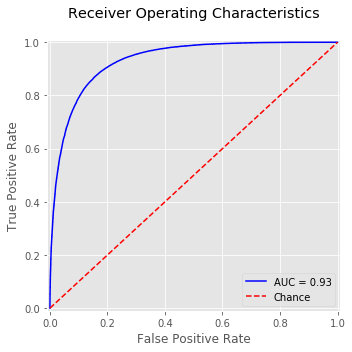

In [288]:
fpr, tpr, _ = roc_curve(y_train, pred_score, pos_label=1)
auc_score = roc_auc_score(y_train, pred_score)

plt.plot(fpr, tpr, 'b',label="AUC = %s"%(round(auc_score,2)))
plt.plot([0, 1], [0, 1],'r--', label = "Chance")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Receiver Operating Characteristics\n")
plt.legend()
plt.tight_layout()

****

#### (M)

**Cross validations is primarily used for:**    

* Testing the effectiveness and generalisation performance of the model, and testing the model to prevent overfitting    
* Determining the hyper parameters for a model, providing the lowest test error.    

****

In [ ]:
lr_classifier = Logistic_Regression()
lr_classifier.fit(X_train,y_train, learningRate=1.4)

In [293]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#### (N)

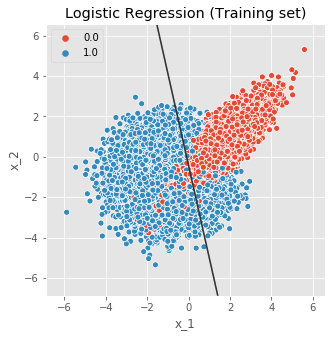

In [294]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
ax = sns.scatterplot(x=X_set[:,0],y=X_set[:,1],hue=y_set)  
min_dim = X_set[:,0].min()-1
max_dim = X_set[:,0].max()+1
X1, X2 = np.mgrid[min_dim:max_dim:0.01,min_dim:max_dim:0.01]
probs = lr_classifier.predict( np.array([X1.ravel(), 
                                         X2.ravel()]).T).reshape(X1.shape)
plt.contour(X1, X2, probs, levels=[.5], 
            cmap="Greys", vmin=0, vmax=.6)  
plt.title('Logistic Regression (Training set)')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()
plt.show()

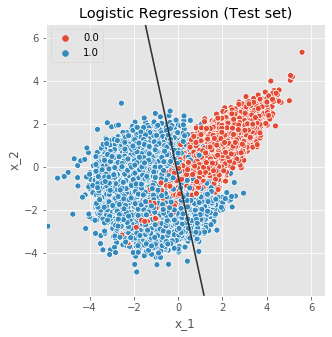

In [24]:
X_set, y_set = X_test, y_test
x_min, x_max = X_set[:,0].min() - 1, X_set[:,0].max() + 1
y_min, y_max = X_set[:,1].min() - 1, X_set[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), 
                     np.arange(y_min, y_max, 0.02)
pred = lr_classifier.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)                     
ax.pcolormesh(xx, yy, pred, cmap=cmap_light)
ax = sns.scatterplot(x=X_set[:,0],y=X_set[:,1],hue=y_set) 
plt.contour(X1, X2, probs, levels=[.5], 
            cmap="Greys", vmin=0, vmax=.6)   
plt.title('Logistic Regression (Test set)')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()
plt.show()

The linear decision boundary does not seems to be effectively separating the two overlapping classes. 
* The **decision boundary could definitely be improved** using a non-linear function or other classifications methods such as KNN. 
* Also, as metioned earlier the best separation could be achieved using a hyper plane between the two classes because the classes are overlapping. 

****

## (O)

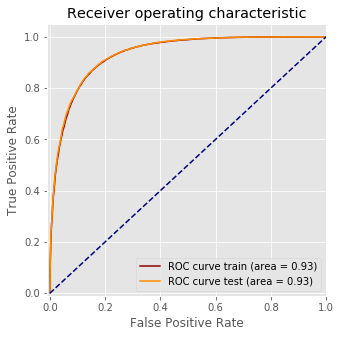

In [116]:
fpr_train, tpr_train, thresholds = 
roc_curve( y_train,lr_classifier.predict(X_train,responseType = "Probab"))
roc_auc_train = auc(fpr_train, tpr_train)

fpr, tpr, thresholds = 
roc_curve(y_test,lr_classifier.predict(X_test,responseType = "Probab"))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr_train, tpr_train, color='darkred',  
         label='ROC curve train (area = %0.2f)' % roc_auc_train)
plt.plot(fpr, tpr, color='darkorange',  
         label='ROC curve test (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  
         linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**With an AUC of 0.93, the logistic regression model seems to be performing very well (for both train and test data) as compared to chance**

*****
*****

# 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class (i.e. class $y=0$, which are not 3's and class $y=1$ which are 3's), from the training dataset.

**(c)** How many examples are present in each class? 
* Show a histogram of samples by class. Are the classes balanced? 
* What issues might this cause?

**(d)** Using **cross-validation, train and test a classifier**. Compare your performance against   
1. A classifier that randomly guesses the class, and      
2. A classifier that guesses that all examples are NOT 3's.    
* Plot corresponding ROC curves and precision-recall curves.   
* Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot    

1. The number of model parameters that are estimated to be nonzero;     
2. The logistic regression cost function, which you created a function to evaluate in the Question 1;     
3. $F_1$-score, and     
4. Area under the curve (AUC).   
* Describe the implications of your findings.

****

**ANSWER**

## (A)

In [71]:
from mnist.loader import MNIST
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2

mndata = MNIST('MNIST')

train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [72]:
# Creating binary lables for checking if the number is 3
binary_train_label = [1 if x==3 else 0 for x in train_labels]
binary_test_label = [1 if x==3 else 0 for x in test_labels]

***

## (B)

In [9]:
label_1 = [i for i in range(len(binary_train_label)) 
           if binary_train_label[i] == 1] 
label_0 = [i for i in range(len(binary_train_label)) 
           if binary_train_label[i] == 0] 

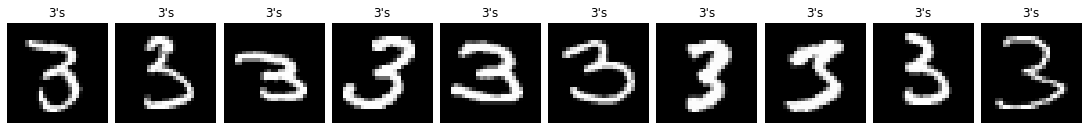

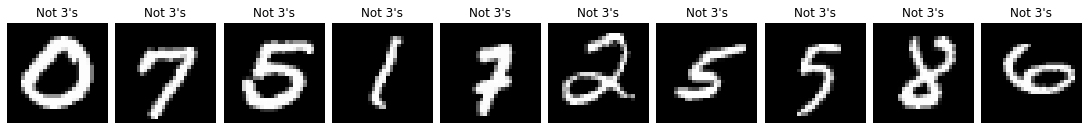

In [120]:
fig, axs = plt.subplots(1,10,figsize=(15,15),
                        constrained_layout=True)

for j in range(10):        
    index = random.choice(label_1)
    pixels = train_images[index]
    pixels = np.array(pixels)
    pixels = pixels.reshape((28, 28))
    axs[j].imshow(pixels, cmap='gray')
    axs[j].axis('off')
    axs[j].set_title("3's")
plt.show()    
print("\n")
fig, axs = plt.subplots(1,10,figsize=(15,15),
                        constrained_layout=True)
for j in range(10):        
    index = random.choice(label_0)
    pixels = train_images[index]
    pixels = np.array(pixels)
    pixels = pixels.reshape((28, 28))
    axs[j].imshow(pixels, cmap='gray')
    axs[j].axis('off')
    axs[j].set_title("Not 3's")
plt.show()    

****

## (C)

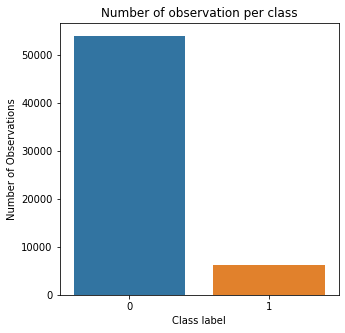

In [255]:
sns.countplot(binary_train_label)
plt.title("Number of observation per class")
plt.xlabel("Class label")
plt.ylabel("Number of Observations")
plt.show()

In [12]:
import collections
counter=collections.Counter(binary_train_label)
counter

Counter({0: 53869, 1: 6131})

The data is highly impbalanced. **Class 1 (number is 3)** has only **6131** observations while **Class 0** (all except 3) has **53,869** observartions, which is almost 8 time of class 0. This could potentially lead to issue in evaluating the model performace.   
* Class imbalance might also give a false impression of a good model when looking at the metrics such as **model accuracy**

******

## (D)

In [13]:
from sklearn.metrics import precision_recall_curve,
average_precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scipy import interp
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [14]:
train_images = np.array(train_images)
binary_train_label = np.array(binary_train_label)
test_images = np.array(test_images)
binary_test_label = np.array(binary_test_label)

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(train_images)
X_test = sc.transform(test_images)

In [16]:
img_clf = RandomForestClassifier(n_estimators = 10, 
                                 criterion = 'entropy', random_state = 0)
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(train_images, binary_train_label)

pred_score = np.empty(len(binary_train_label),dtype='object')
plt.rcParams["figure.figsize"] = (5,5)

for train_index, test_index in skf.split(train_images, 
                                         binary_train_label):
    cross_X_train, cross_X_test = 
    train_images[train_index], train_images[test_index]
    cross_y_train = binary_train_label[train_index]

    
    img_clf.fit(cross_X_train,cross_y_train)
    
    y_score = img_clf.predict_proba(cross_X_test)
    pred_score[test_index] = y_score[:,1]

In [17]:
all_0 = np.zeros(len(train_images))
random_model = np.random.randint(2, size = len(train_images))

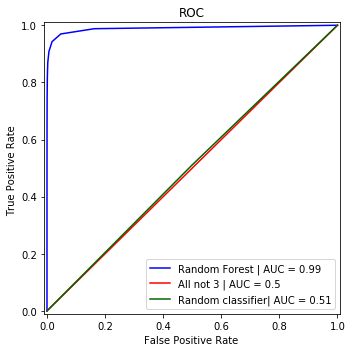

In [77]:
fpr, tpr, _ = 
roc_curve(binary_train_label, pred_score, pos_label=1)
auc_score = 
roc_auc_score(binary_train_label, pred_score)
zero_fpr, zero_tpr, _ = 
roc_curve(binary_train_label, all_0, pos_label=1)
zero_auc  = 
roc_auc_score(binary_train_label, all_0)
rand_fpr, rand_tpr, _ = 
roc_curve(binary_train_label, random_model, pos_label=1)
rand_auc  = 
roc_auc_score(binary_train_label, random_model)

plt.plot(fpr, tpr, 'b',
         label= "Random Forest | AUC = %s"%(round(auc_score,2)))
plt.plot(zero_fpr,zero_tpr,'red', 
         label = 'All not 3 | AUC = %s'%(round(zero_auc,2)))
plt.plot(rand_fpr,rand_tpr,'darkgreen', 
         label = 'Random classifier| AUC = %s'%(round(rand_auc,2)))
#plt.plot([0, 1], [0, 1],'r--', label = "Chance")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate ')
plt.xlabel('False Positive Rate ')
plt.title("ROC")
plt.legend()
plt.tight_layout()

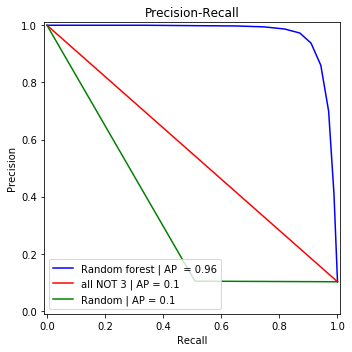

In [79]:
# Random forest
precision, recall, thresholds = 
precision_recall_curve(binary_train_label, pred_score)
average_precision = 
round(average_precision_score(binary_train_label, pred_score),2)

# all zeros
zero_precision, zero_recall, zero_thresholds = 
precision_recall_curve(binary_train_label, all_0)
average_precision_zero = 
round(average_precision_score(binary_train_label, all_0),2)

# chance/randome
rand_precision, rand_recall, rand_thresholds = 
precision_recall_curve(binary_train_label, random_model)
rand_precision_zero = 
round(average_precision_score(binary_train_label, random_model),2)


plt.plot(recall, precision, 'b', 
         label='Random forest | AP  = %s'%(average_precision))
plt.plot(zero_recall,zero_precision, 'red', 
         label='all NOT 3 | AP = %s'%(average_precision_zero))
plt.plot(rand_recall,rand_precision, 'g', 
         label='Random | AP = %s'%(rand_precision_zero))
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title("Precision-Recall")
plt.legend(loc='lower left')
plt.tight_layout()

**Random forest** classifier performed very well with an AUC of 0.99, as compared to *random guessing* or *predicting all negative class* (0, not 3's).

* The superior performance is visible in both the ROC and Precision-recall curve.
* In the ROC curve, the random forest is almost perfect with an AUC of 0.99. While, random guess and all NOT 3 prediction had a similar ROC curve and AUC of 0.5. 
* However, given the class imbalance, ROC is usually not the best metric to access model performance.
* Upon plotting a **Precision-recall** curve, a similar superior preformance could be seen with **Random forest** giving a *Average Precision Score* of **0.96**, as compared to that of *random guessing* and *all NOT 3 predictor*, which have AP score of 0.1


****

## (F)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np

In [73]:
lass_clf = LogisticRegression(penalty='l1', C=1, solver="liblinear")
lass_clf.fit(train_images,binary_train_label)

#custom logistic regression from Q1 for cost calculation
cust_log = Logistic_Regression() 


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
cv_range = [0.001,0.01,0.1,1,10]
lass_df = pd.DataFrame(index=range(len(cv_range)), 
                       columns=["Regu_coeff", "non_zero", "cost","f1","auc"])

In [36]:
i = 0 
for c_va in cv_range:
    lass_clf= LogisticRegression(penalty='l1', C=c_va, 
                                 solver="liblinear",random_state=42)
    lass_clf.fit(train_images,binary_train_label)
    
    
    y_score = lass_clf.predict_proba(test_images)
        
    non_zero = np.count_nonzero(lass_clf.coef_)   #1
    
    cost = cust_log.costFunction(y_= binary_test_label, 
                                 y_hat_ = y_score[:,1] ) #2
    
    f1_sc = f1_score(binary_test_label,lass_clf.predict(test_images)) #3
    
    
    
    fpr, tpr, thresholds = roc_curve(binary_test_label, y_score[:,1])
    area_under_curve = auc(fpr, tpr) #4
    
    lass_df.loc[i] = [c_va,non_zero,cost,f1_sc,area_under_curve]
    i+=1    

In [37]:
lass_df

,Regu_coeff,non_zero,cost,f1,auc
0,0.001,299,0.0804388,0.875698,0.979125
1,0.01,482,0.0727075,0.890585,0.984146
2,0.1,573,0.0732391,0.88855,0.985183
3,1,615,0.0743779,0.887532,0.98514
4,10,637,0.0756442,0.88708,0.984849


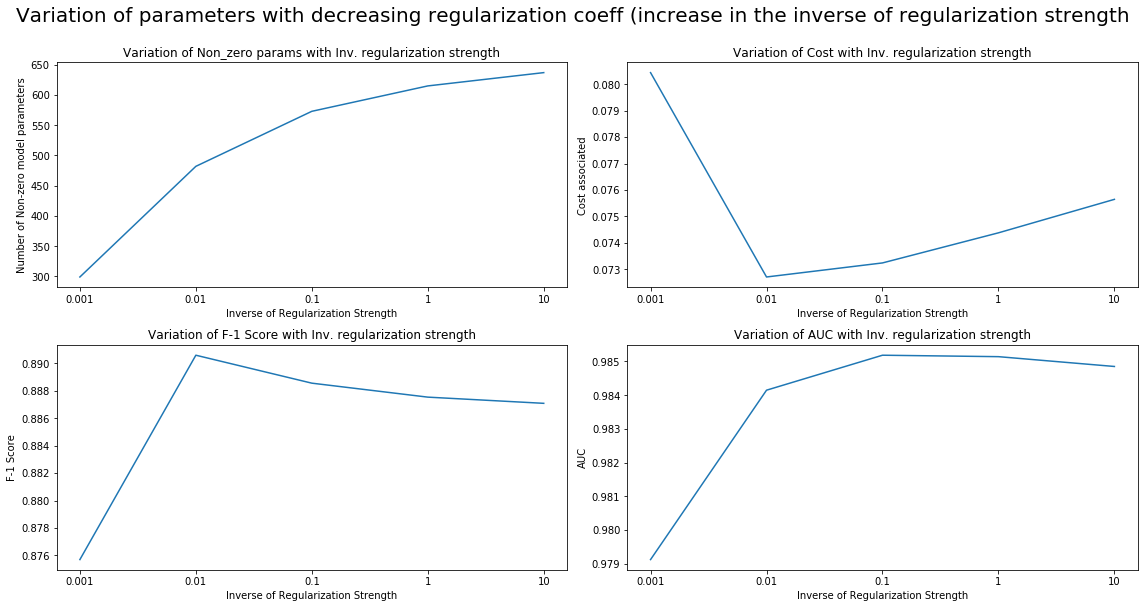

In [121]:
cv_2 = [str(x) for x in cv_range]
fig, axs = plt.subplots(2,2,figsize=(16,8))

axs[0,0].plot(cv_2,lass_df['non_zero'])
axs[0,0].set_xlabel("Inverse of Regularization Strength")
axs[0,0].set_ylabel("Number of Non-zero model parameters")
axs[0,0].set_title("Variation of Non_zero params with Inv. \
                   regularization strength")

axs[0,1].plot(cv_2,lass_df['cost'])
axs[0,1].set_xlabel("Inverse of Regularization Strength")
axs[0,1].set_ylabel("Cost associated")
axs[0,1].set_title("Variation of Cost with Inv. regularization \
                   strength")

axs[1,0].plot(cv_2,lass_df['f1'])
axs[1,0].set_xlabel("Inverse of Regularization Strength")
axs[1,0].set_ylabel("F-1 Score")
axs[1,0].set_title("Variation of F-1 Score with Inv. \
                   regularization strength")

axs[1,1].plot(cv_2,lass_df['auc'])
axs[1,1].set_xlabel("Inverse of Regularization Strength")
axs[1,1].set_ylabel("AUC")
axs[1,1].set_title("Variation of AUC with Inv. regularization \
                   strength")

fig.suptitle("Variation of parameters with decreasing \
             regularization coeff (increase in the inverse of \
             regularization strength",
             x=0.5,y=1.05,fontsize=20)
plt.tight_layout()



As can be seen from the plot,

As we are moving along the x-axis, the value of *C* ($=1/\lambda$) is **increasing**, which in turn means the value of **regularization parameter**/strength or $\mathbf{\lambda}$ is **Decreasing**. 

* As we move along with decreasing $\lambda$ (right -> left on x-axis), the number of **non-zero parameters** increases. This is a expected behaviour in the sense, when the regularization strength decreases, so does the penalty on the weigths due to regularization, and less and less weigths will be converging towards zero.  
* However, the **Cost** seems to drop steeply to a minimum value at C = 0.01 or $\lambda=100$ from C = 0.001, and then increase gradually as the effect of regularization decreases when moving left to right. 
* An inverse trend is visible with the **F-1** score (which is the good esitmator for performance in case of class imbalance). As the regularization decreases on moving left to right, the F-1 score increase steeply to a maximum value at C = 0.01 or $\lambda=100$, followed by gradually decreasing as the effect of regularization decreases. 
* **AUC** also showed an incremental trend. As already dicsussed, AUC might not be the best metric to measure model performance here, it can be seen from the plot that the maximum AUC is achieved at C = 0.1 or $\lambda=10$ instead of C=0.01, point corresponding to minimum cost and maximum F-1 score.

**Based on the analysis, the best C value seems to be 0.01 or regularization strength, $\lambda=100$, in order to achieve best model performance**

*****
*****

# 3

### [10 points] Comparing the Bayes' decision rule with logistic regression

The phrase "Bayes' decision rule" is often used to describe a classifier decision rule that minimizes misclassification rate (equally penalizing false positives and false negatives). In this exercise you will first determine the Bayes's decision rule for a binary classification problem where you know the likelihood of data from each class. The binary classification problem has two classes with data distributed as exponential random variables:

$$P(x|C_i) = \lambda_i e^{-\lambda_i x}$$

Where $C_i$ represents the class from which the sample is drawn (0 or 1). We also know that $\lambda_0 = 1$ and $\lambda_1 = 5$.

**(a)** Plot the probability of each class conditional distribution (e.g. likelihood function), $P(x|C_0)$ and $P(x|C_1)$ on the sample plot in the domain $x \in [0,2]$. *You can use [`scipy`'s `expon` module](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon) for this. Note that the `scale` parameter for this module is defined as $1/\lambda$.*

**(b)** Assuming the prior class distributions are $P(C_0)=P(C_1)=0.5$, determine the Bayes' decision rule using the information above including the posterior distributions and the prior distributions. You will assign the most probable class to the data based on the value of $x$. The decision rule will be of the form: 

If $x > x^*$, then predict Class 0, otherwise predict Class 1

Determine the value $x^*$ that minimizes misclassification (equally penalizing false positives and false negatives, and no penalty/reward for correct detections). Show your work in deriving this value.

**(c)** How does your answer in (b) relate to the the plot you made in (a)? Why?

**(d)** Load the test data in the file `A3_Q3_test.csv`. Apply your decision rule to the data.   
> What is the misclassification rate (error rate, or fraction of misclassified samples) of this decision rule?

**(e)** Load the training data in the file `A3_Q3_train.csv` and train a logistic regression classifier on the data (using default parameters).    
> What is your misclassification error for your test dataset?    
> How does this compare with the Bayes' classifier?

**(f)** What is your decision rule for your logistic regression model?   
> To compute this, extract the parameters from your fit model (look for the `coef_` and `intercept_` attributes) and since the classes are balanced, the decision rule will be to classify a sample $x$ as Class 1 when your logistic regression sigmoid is greater than 0.5 (the halfway point from the two extremes of 0 and 1). How does this compare with the Bayes' classifier?

**(g)** If the prior probabilities were not $P(C_0)=P(C_1)=0.5$, but instead if P(C_1)>P(C_0). How would this impact the optimal decision rule? Would it change, if so, would $x^*$ be larger or smaller?

## ANSWER

***

In [241]:
from scipy.stats import expon
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## (A)

In [242]:
ran = np.arange(0,2,0.01)
dist_exp = pd.DataFrame(index=range(len(ran)), columns=["x", "fx_0", "fx_1"])
i=0
for x in ran:
    rv = expon(scale=1)
    f_x_0 =  rv.pdf(x)
    rv = expon(scale=1/5)
    f_x_1 =  rv.pdf(x)
    dist_exp.loc[i] = [x,f_x_0,f_x_1]
    i+=1

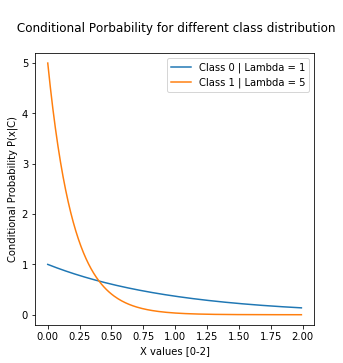

In [252]:
plt.plot("x","fx_0",data=dist_exp,label="Class 0 | Lambda = 1" )
plt.plot("x","fx_1",data=dist_exp,label="Class 1 | Lambda = 5" )
plt.legend()
plt.ylim([-0.2,5.2])
plt.xlabel("X values [0-2]")
plt.ylabel("Conditional Probability P(x|C)")
plt.title("\n Conditional Porbability for different class distribution\n",size=12)
plt.show()

******

## (B)

$\hspace{1cm}For\hspace{0.1cm}Class\hspace{0.1cm}0 ;\hspace{0.5cm} P(x|C_{0}) = \lambda_{0}e^{-\lambda_{0}x}$      
$\hspace{1cm}For\hspace{0.1cm}Class\hspace{0.1cm}1 ;\hspace{0.5cm} P(x|C_{1}) = \lambda_{1}e^{-\lambda_{1}x}$     

$\hspace{1cm}Where: \lambda_{0} = 5 , \lambda_{1} = 5$   

$\hspace{1cm}On\hspace{0.1cm}substituting\hspace{0.1cm}values\hspace{0.1cm}of\hspace{0.1cm}\lambda_{0}$ and $\lambda_{1}$ : $P(x|C_{0}) = e^{-x}\hspace{0.5cm};\hspace{0.5cm}P(x|C_{1}) = 5e^{-5x}$    

$\hspace{1cm}Also\hspace{0.1cm}Given\hspace{0.1cm}:\hspace{4cm}P(C_{0}) = P(C_{1}) = 0.5 $    
$\hspace{1cm}Calculating\hspace{0.1cm}P(x)\hspace{0.1cm}:\hspace{3cm}P(x)\hspace{0.1cm}=\hspace{0.1cm}P(x|C_{0}).P(C_{0}) +  P(x|C_{1}).P(C_{1})$  

$\hspace{1cm}So,\hspace{0.1cm}Conditional\hspace{0.1cm}probability\hspace{0.1cm}of\hspace{0.1cm}a\hspace{0.1cm}class
\hspace{0.1cm}given\hspace{0.1cm}\textbf{x}\hspace{0.1cm}can\hspace{0.1cm}be\hspace{0.1cm}written\hspace{0.1cm}as:$        

$$P(C_{i}|x) =  \dfrac{P(x|C_{i}).P(C_{i})}{P(x)}$$   

$\hspace{1cm}For\hspace{0.1cm}Class\hspace{0.1cm}0\hspace{0.1cm}
P(C_{0}|x)\hspace{0.1cm}=\hspace{0.1cm}\dfrac{P(x|C_{0}).P(C_{0})}{P(x)}\hspace{0.1cm}$

$\hspace{1cm}For\hspace{0.1cm}Class\hspace{0.1cm}1\hspace{0.1cm}
P(C_{1}|x)\hspace{0.1cm}=\hspace{0.1cm}\dfrac{P(x|C_{1}).P(C_{1})}{P(x)}\hspace{0.1cm}$

$\hspace{1cm}\textbf{Equally penalizing}\hspace{0.1cm}False\hspace{0.1cm}Positive\hspace{0.1cm}and\hspace{0.1cm}
False\hspace{0.1cm}Negative,\hspace{0.1cm}with\hspace{0.1cm}no\hspace{0.1cm}reward\hspace{0.1cm}for\hspace{0.1cm}correct\hspace{0.1cm}predictions$

$\hspace{1cm}\textbf{Minimizing misclassification}\hspace{0.1cm}\hspace{0.1cm}and\hspace{0.1cm}solving\hspace{0.1cm}for\hspace{0.1cm}\textbf{x}:$    
    
$\hspace{4cm}\dfrac{P(C_{1}|x)}{P(C_{0}|x}\hspace{0.1cm}>1$  

$\hspace{1cm}Substituting\hspace{0.1cm}values\hspace{0.1cm}of\hspace{0.1cm}P(C_{1}|x)\hspace{0.1cm}and\hspace{0.1cm}P(C_{0}|x)$

$\hspace{4cm}\dfrac{\hspace{0.1cm}\dfrac{P(x|C_{0}).P(C_{0})}{P(x)}\hspace{0.1cm}}
{\hspace{0.1cm}\dfrac{P(x|C_{1}).P(C_{1})}{P(x)}\hspace{0.1cm}}\hspace{0.1cm}>1$    

$\hspace{1cm}Solving\hspace{0.1cm}and\hspace{0.1cm}eliminating\hspace{0.1cm}P(x),\hspace{0.1cm}and\hspace{0.1cm}since\hspace{0.1cm}P(C_{0})=P(C_{1}),\hspace{0.1cm}$    
$\hspace{1cm}eliminating\hspace{0.1cm}P(C_{i}),\hspace{0.1cm}and\hspace{0.1cm}substituting\hspace{0.1cm}values\hspace{0.1cm}of\hspace{0.1cm}P(x|C_{1})\hspace{0.1cm}and\hspace{0.1cm}P(x|C_{0})$    

$\hspace{4cm}\dfrac{5e^{-5x}}{e^{-x}}\hspace{0.1cm}>1$

$\hspace{4cm}5e^{-4x}\hspace{0.1cm}>1$   

$\hspace{4cm}e^{-4x}\hspace{0.1cm}>\dfrac{1}{5}$

$\hspace{4cm}-4x\hspace{0.1cm}>ln(\dfrac{1}{5})$

$\hspace{4cm}-4x\hspace{0.1cm}>-1.60943$

$\hspace{4cm}x\hspace{0.1cm}<\frac{1.60943}{4}$

$\hspace{4cm}\textbf{x}\hspace{0.1cm}<\textbf{0.4023}\hspace{0.1cm}for\hspace{0.1cm}Class\hspace{0.1cm}=\hspace{0.1cm}1$     
$\hspace{4cm}\textbf{x}\hspace{0.1cm}>\textbf{0.4023}\hspace{0.1cm}for\hspace{0.1cm}Class\hspace{0.1cm}=\hspace{0.1cm}0$    

$\hspace{4cm}\textbf{x*}=0.4023$

$\hspace{1cm}P(C_{0}|x^*)\hspace{0.1cm}=\hspace{0.1cm}P(C_{1}|x^*)\hspace{0.1cm}=0.6687$ 

Hence, the bayes decision rule $\textbf{x}^*$ would be defined as, if $\textbf{x}$ < $\textbf{x}^*$, then Class 1 else Class 0.

****

## (C)

The point of decision rule $\textbf{x}^*$ is the point of intersection of the two conditional probability lines in the plot in (a). The reason behind this is, given equal prior probabilities of the class, when moving across the plot from left to right, the likelihood of a point being a class-1 is much higher than that of class-0. However, as we move to the right, the likelihood of class-1 reduces and at the point x val of 0.4023, the probability of class-1 drops below than that of class-0. As a result, for the points beyond 0.4023, the point being a class-0 is more probable that of being a class-1

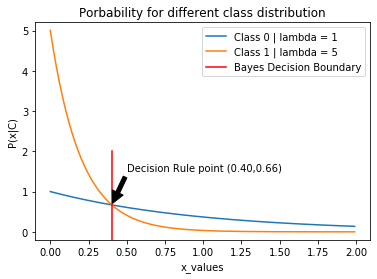

In [5]:
plt.plot("x","fx_0",data=dist_exp,label="Class 0 | lambda = 1" )
plt.plot("x","fx_1",data=dist_exp,label="Class 1 | lambda = 5" )
plt.plot([0.4023,0.4023],[-0.2,2], c= 'r',label="Bayes Decision Boundary")
plt.legend()
plt.annotate(xy=(0.4023,0.6687),
             s="Decision Rule point (0.40,0.66)",
             arrowprops=dict(facecolor='black', shrink=0.05),xytext=(0.5,1.5))
plt.ylim([-0.2,5.2])
plt.xlabel("x_values")
plt.ylabel("P(x|C)")
plt.title("Porbability for different class distribution")
plt.show()

*****

## (D)

In [181]:
q3_train = pd.read_csv("A3_Q3_train.csv",index_col=0)
q3_test = pd.read_csv("A3_Q3_test.csv",index_col=0)

q3_train = np.array(q3_train)
q3_test = np.array(q3_test)

In [224]:
bayes_check = np.ones(len(q3_train))

def bayes_check(x):
    if x > 0.4023:
        return 0
    else :
        return 1
bayes_check_vec = np.vectorize(bayes_check)
    
bayes_pred = bayes_check_vec(q3_test[:,0])

In [225]:
from sklearn.metrics import accuracy_score
accu_bayes= accuracy_score(q3_test[:,1],bayes_pred)

In [232]:
print("\nError rate for Bayes rule is : %s"%(round(1-accu_bayes,3)))


Error rate for Bayes rule is : 0.234


****

## (E)

In [236]:
logis_clf = LogisticRegression()
logis_clf.fit(q3_train[:,0].reshape(-1,1),q3_train[:,1])
logic_pred = logis_clf.predict(q3_test[:,0].reshape(-1,1))
accu_logis= accuracy_score(q3_test[:,1],logic_pred)

In [231]:
print("\nError rate for Logistic regression is : %s"%(round(1-accu_logis,3)))


Error rate for Logistic regression is : 0.234


**The error rate is same as that of Bayes classifier.**

****

## (F)

In [238]:
coeff = logis_clf.coef_ # -3.9755
intercept = logis_clf.intercept_  # 1.6034

$\hspace{1cm}0.5\hspace{0.1cm}=\dfrac{1}{1+e^{-X}}$    
    
$\hspace{1cm}1+e^{-X}\hspace{0.1cm}=\dfrac{1}{0.5}$   

$\hspace{1cm}e^{-X}\hspace{0.1cm}=2-1$   

$\hspace{1cm}-X\hspace{0.1cm}=ln(1) = 0 $   

$\hspace{1cm}Substituing\hspace{0.1cm}X\hspace{0.1cm}=\hspace{0.1cm}intercept\hspace{0.1cm}+\hspace{0.1cm}Coeff\hspace{0.1cm}*\hspace{0.1cm}x\hspace{0.1cm}$    

$\hspace{1cm}-(1.6035 - 3.9755 * x) = 0$

$\hspace{1cm}x = \dfrac{1.6035}{3.9755} = 0.4033$



The decision rule for Logistic regression (0.4033) is very similar to that of bayesian decision boundary i.e. 0.4023, which explains the similar error rate.

****

## (G)

If the prior probabilites of classes are not the same, the **optimal decision rule will change**. With the increase in the prior probability for Class_1 ($\mathbf{P}(\mathbf{C}_1)$), which in a sense translates to class_1 having a higher probabilty to occur as compared to  class_0 ($\mathbf{P}(\mathbf{C}_0)$), the bayes decision rule (solved in (b)) will yield a larger value of $\textbf{x}^*$. The optimial decision boundary will be **larger** than 0.40. 

****     
****

# 4

### [30 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. 
> Explain why it's interesting and    
> what you'd like to accomplish. You're encouraged to be creative.

**(b)** Download the data and plot the data to describe it. You can use any dataset of interest to you with the exception of the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset. Possible sources of dataset include (but are not limited to):

- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [Amazon Open Datasets](https://registry.opendata.aws/)
- [Microsoft's Open Data](https://msropendata.com/)
- [Google's Dataset Search](https://datasetsearch.research.google.com/)
- [Awesomedata's list of datasets](https://github.com/awesomedata/awesome-public-datasets)

**(c)** Formulate your supervised learning question:     
> (a) What is your target variable (what are you trying to predict) and what predictors do you have available?    
> (b) Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and **why**? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation.   
> Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, where it did not, and how you could improve it.   
> Summarize the conclusions from your work (this should involve a degree of interpretation more so than "my classifier achieved an AUC of 0.8").

*This grade for this question is based on    
(a) the completeness of the answer in addressing each of the above components,  
(b) the quality of the work and accuracy of the interpretation of the results of the analysis,    
(c) the presentation and professionalism of the work, and    
(d) the amount of creativity demonstrated by the work.*

### ANSWER
*****

## (A)

The question I'm addressing is a **multi-class image classification** problem. The motivation behind the project is the problem statement proposed by a potential recruiter for summer internship, *Proofpoint*, intended for their summer internship program.    
* Their summer internship programs revolves around flagging of phishing websites based on the logos on an HTML page. This project is a scaled down version of the original problem in the sense that it only involves logo's from 27 companies and the test-set would be local images rather than the images extracted from a given URL (which needs to be flagged).    
* The objective is to use this project as a part of the portfolio while applying for the particular internship, which I hope will give me the edge over other candidates.   

*****

## (B)

The dataset is referenced as **Flickr Logos 27 Dataset**, which could be accessed using this url http://image.ntua.gr/iva/datasets/flickr_logos/  
     
The training data consists of **4536 images of logos belonging to 27 companies (168 for each)** along with the annotation of the location of the logo in the image. The test data (which will be referred to as **Query data** moving forward)however, only have labels and NOT the annotations of the location of the logos. 

In [124]:
# Importing libraries
import os
import re
import cv2
import joblib
import numpy as np
import pandas as pd
from PIL import ImageOps
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [125]:
### Reading annotations and labels for training data

train_img_label_file = os.path.join(os.getcwd(),
                                    "flickr_logos_27_dataset_training_set_annotation.txt")

train_images = pd.read_csv(train_img_label_file,
                           sep=' ', 
                           usecols = [i for i in range(7)],
                           header=None,  
                           names=["file_name",'label','subset','x1','y1','x2','y2'])

In [126]:
train_images.head()

,file_name,label,subset,x1,y1,x2,y2
0,144503924.jpg,Adidas,1,38,12,234,142
1,2451569770.jpg,Adidas,1,242,208,413,331
2,390321909.jpg,Adidas,1,13,5,89,60
3,4761260517.jpg,Adidas,1,43,122,358,354
4,4763210295.jpg,Adidas,1,83,63,130,93


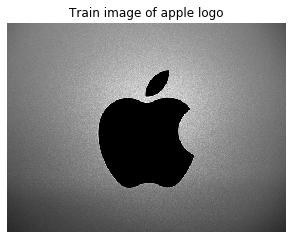

In [236]:
idx = 465
pth = 'data/'+train_images.loc[idx,'file_name']
image = Image.open(pth)
plt.imshow(image)
plt.axis("off")
plt.title("Train image of apple logo")
plt.show()

In [128]:
### Reading labels for test data

test_img_label_file = os.path.join(os.getcwd(), "flickr_logos_27_dataset_query_set_annotation.txt")

test_images = pd.read_csv(test_img_label_file,
                           sep='\t',
                           header=None,  
                           names=["file_name",'label'])

In [129]:
test_images.head()

,file_name,label
0,2403695909.jpg,Adidas
1,2912587920.jpg,Adidas
2,3441398196.jpg,Adidas
3,4605630935.jpg,Adidas
4,4606245138.jpg,Adidas


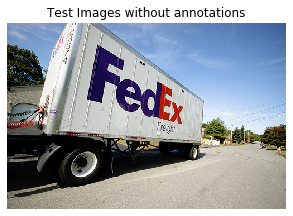

In [235]:
idx = 32
pth = 'data/'+test_images.loc[idx,'file_name']
image = Image.open(pth)
plt.imshow(image)
plt.axis("off")
plt.title("Test Images without annotations")
plt.show()

****

## (C)

The target variable is **'label'**, which is the brand corresponding the particular image containing the logo. And the predictors are the 3 channel RGB values in a image.

Yes, the data is being pre-processed before being used in the training of a classifier. Following transformation would be done on the data :   
    
1. Cropping the image using the annotations (in case of trainig data)
2. Converting from RGB channel to grayscale (for dimensionality reduction)
3. Equalizing image histogram.
4. Randomly rotation the image 
5. Calculating Histogram of Oriented Gradient (HOG) of the image
6. Coversion of the image to a numpy array.
7. Normalizing and scaling the numpy array values using *Standard Scaler*

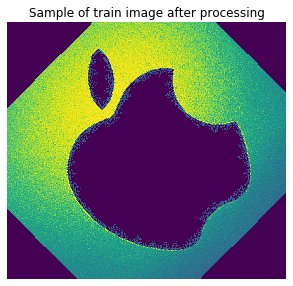

In [237]:
# Testing image processing methods 
# Cropping using annotations and changing it to greyscale along with equalizing
idx = 465
pth = 'data/'+train_images.loc[idx,'file_name']
image = Image.open(pth)
image = image.crop([train_images.loc[idx,'x1'],train_images.loc[idx,'y1'],train_images.loc[idx,'x2'],train_images.loc[idx,'y2']])
image = ImageOps.grayscale(image)
image = ImageOps.equalize(image)
image = image.rotate(45)

plt.imshow(image)
plt.axis('off')
plt.title("Sample of train image after processing")
plt.show()

***

## (D)

The supervised learning approach I'll be using is **Support vector machine (SVM)** classifier because it's highly effective in classifying high dimensional data. 
* Since the data is an image data pre-processed to 64 X 64 pixel image, which would generate 4096 dimension (which is still a lot), which then is passed through HOG to generate a 120 dimension vector, which is relatively low but still would be considered as high dimension. Based on my research, SVM appeared as the best model in case of image data when used in conjunction with HOG. The same is established in the model performance later in the project.

***

## (E)

Since it's a multi-class classification problem with 27 classes, the primary performance metric used would be model **accuracy**. Since the classes are balannced, model accuracy would give a good estimate of model performance. 

**Other metrics that could be used**
* A confusion matrix for 27 classes could not be generated within this notebook space and,     
* ROC could be plotted using one vs all method, but with the given space, 27 plots would be hard to fit. 

***

## (F)

### Approach

* The $\textbf{training data}^1$ is processed as per the steps metioned in (C).
* The $\textbf{training data}^1$ is divided into $\textbf{train}^2$ and $\textbf{test}^2$. Following which, the $\textbf{train}^2$ is further divided for **K-fold cross validation** to check generalization performance of the model. 
* Once the K-fold check is done, the model is trained over the entire $\textbf{train}^2$ and the performance is measured over the $\textbf{test}^2$. 
* Following that the model is trained using the original $\textbf{training data}^1$ containing 4536 images, and performance is evaluated using the **Query data** (the non-annotated one). Given the **Query data** is not annotated, the model could perform poorly for this data (since the model is trained over exact logos without the surrouding noise.



## Data Pre-processing

In [182]:
#Cropping using annotations,changing it to greyscale along with equalizing and resizing

def image_processor(label_df,crop=True):
    '''
    function to read and pre process training images with labels
    Returns a numpy array of images
    '''
    angle = [0,45,90,135]
    #afine_tf = tf.AffineTransform(shear=0.2)
    train_img_arr = []
    num_images = len(label_df)
    for i in range(num_images):
        pth = 'data/'+label_df.loc[i,'file_name']
        image = Image.open(pth)
        if crop == True :
            x1 = train_images.loc[i,'x1']
            y1 = train_images.loc[i,'y1']
            x2 = train_images.loc[i,'x2']
            y2 = train_images.loc[i,'y2']
            image = image.crop([x1,y1,x2,y2])
        image = ImageOps.grayscale(image)
        image = ImageOps.equalize(image)
        #image = image.rotate(np.random.choice(angle))
        #if i%4 == 0:
        #    image = tf.warp(image, inverse_map=afine_tf)
        train_img_arr.append(np.asarray(image.resize([64,64]),dtype="int32")) 
    return np.array(train_img_arr)

In [ ]:
train_data = image_processor(train_images)
y = train_images['label']
train_data.shape

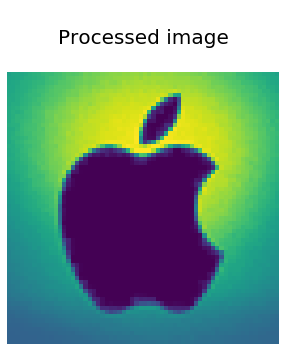

In [205]:
# resized processed image
plt.imshow(train_data[465])
plt.axis('off')   
plt.title("\nProcessed image\n", size=20)
plt.show()

## Applying HOG (Histogram of Oriented gradient)

In [206]:
from skimage import color
from skimage.feature import hog

In [207]:
ppc = 16
hog_images = []
hog_features = []
for image in train_data:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

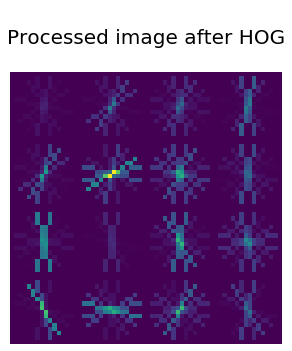

In [208]:
plt.imshow(hog_images[460])
plt.axis('off')   
plt.title("\nProcessed image after HOG\n", size=20)
plt.show()

In [ ]:
feature_vec_train = np.array(hog_features)
print(np.shape(feature_vec_train))

sc = StandardScaler()
feature_vec_train = sc.fit_transform(feature_vec_train)

### Creating  $\textbf{train}^2$ and  $\textbf{test}^2$ data from the original training set

In [210]:
X_train, X_test, y_train, y_test = train_test_split(feature_vec_train, y, test_size = 0.25, random_state = 21)

***

## (G)

### Performing 10 fold cross validation on the  $\textbf{train}^2$ using SVM

In [219]:
clfs = svm.SVC()
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(feature_vec_train, y)

pred_score = np.empty(len(y),dtype='object')
plt.rcParams["figure.figsize"] = (5,5)

for train_index, test_index in skf.split(feature_vec_train, y):
    cross_X_train, cross_X_test = feature_vec_train[train_index], feature_vec_train[test_index]
    cross_y_train = y[train_index]

    
    clfs.fit(cross_X_train,cross_y_train)
    
    y_score = clfs.predict(cross_X_test)
    pred_score[test_index] = y_score

In [221]:
acckv = accuracy_score(y_true=y,y_pred= pred_score)
print("\nAccuracy after cross validation : %s percent"%(round(acckv,3)*100))


Accuracy after cross validation : 98.8 percent


The cross-validation yielded **98.8% accuracy** which shows the model overall generalization performance with annotated images is quite good.

### Training the classifier on the entire $\textbf{train}^2$ dataset and evaluated on $\textbf{test}^2$

In [218]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_true=y_test,y_pred= y_pred)
print("\nAccuracy with test data : %s percent"%(round(acc,3)*100))


Accuracy with test data : 97.8 percent


After training on the entire $\textbf{train}^2$ data, and testing the model performance on the $\textbf{test}^2$ data, the model yeilded **98.7% accuracy** which shows the model overall generalization performance with annotated images is quite good.

### Training the classifier on the entire  $\textbf{training}^1$ data and evaluating on non-annotated Query data 

   

In [ ]:
#Training the classifier on the actual training dataset with 4536 annotated logo images
clf = svm.SVC()
clf.fit(feature_vec_train, y)

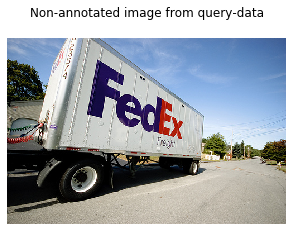

In [238]:
# sample of a non-annotated test images

idx = 32
pth = 'data/'+test_images.loc[idx,'file_name']
image = Image.open(pth)
plt.imshow(image)
plt.axis('off')
plt.title("Non-annotated image from query-data\n")
plt.show()

In [ ]:
test_data = image_processor(test_images, crop=False)
y_test_data = test_images['label']
#test_data.shape

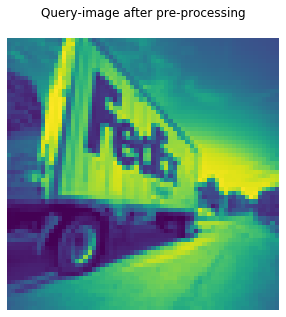

In [240]:
plt.imshow(test_data[32])
plt.axis('off')
plt.title('Query-image after pre-processing\n')
plt.show()

In [226]:
test_hog_images = []
test_hog_features = []
for image in test_data:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    test_hog_images.append(hog_image)
    test_hog_features.append(fd)

feature_vec_test = np.array(test_hog_features)

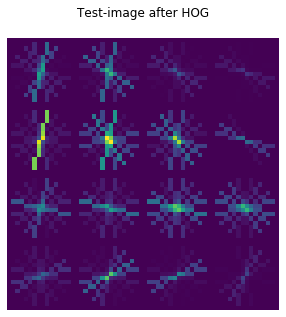

In [227]:
plt.imshow(test_hog_images[32])
plt.axis('off')
plt.title('Test-image after HOG\n')
plt.show()

In [228]:
feature_vec_test = sc.transform(feature_vec_test)
tes_pred = clf.predict(feature_vec_test)

In [230]:
acc_te = accuracy_score(y_true=y_test_data ,y_pred= tes_pred)
print("\nAccuracy with non-annotated test images : %s percent"%(round(acc_te,3)*100))


Accuracy with non-annotated test images : 11.1 percent


As expected, the model performed **very poorly** with the **non-annotated query data**, which is primarily due to location of the logo within the image.

******

## (H)

* Based on the analysis, it appearead when working with the annotated data and cropping the image, the model performed very good at 98% accuracy rate both in cross-validation, and with the test data.
* However, the poor performance with the original non-annotated test data could be attributed to the noise in the image surroundings the logo. Since the model was trained on the cropped images, containing only logos, the model 
* In order to improve the performance, the test data needs to be processed through an **object recognition algorithm**, which would detect the logo within an image, which then could be pass through this classifier. 
* Also, given the object recognition, following future work could be done :    
> * To improve the prediction algorithm performance over large number of logos (not just 27), convolutional neural network could be used
> * Additional functionality could be added to address the original problem (detecting phishing website). This could be achieved using screen scrapping and downloding images from a web url and then predicting if the logo matches to a certain brand or not.

****
$\hspace{16cm}END$
****